# Supernova distances and redshifts

Measuring the cosmological relationship between distance and redshift is at the heart of the entire field of cosmology and allowed, among other things, the discovery of dark energy! At high redshifts, this is done with Type Ia Supernova which are standard (or better, standardizable) candles.

Let's recall the definition of magnitude and the distance modulus (ah! the astronomers...)

$\mu = m - M = 5 log_{10}(\frac{d_L}{pc}) - 5$
 
Here is the Hubble diagram for Type Ia supernovae (which are standard candels). The lines show the predictions for cosmologies with varying amounts of Ωm and ΩΛ. The observed points all lie above the line for a universe with zero Λ. The lower panel, with the slope caused by the inverse square law taken out, shows the difference between the predictions more clearly and shows why a model with ΩΛ > 0 is favored.

## Part 1

**Task**

- First, explore fitting this data with the tecniques we have seen.
- Start from linear regression and polynomial regression
- For the case of polynomial regression, just fit many of them for now.
- Let's bet based on intuition! Which fit is the best?
- In what cases are you underfitting the data?
- In what cases are you overfitting the data?
- Now split the data into training and validation sets
- Implement a cross-validation procedure
- Pick the best!
- Does it agree with our bets?

**OPTIONAL**

- Repeat with Basis Function Regression and Kernel Regression
- Explore what happens when you change the number of datapoints and plot the resulting learning curves.

In [97]:
import numpy as np
import matplotlib.pyplot as plt

from astroML.datasets import generate_mu_z
#from sklearn.linear_model import LinearRegression
from astroML.linear_model import LinearRegression
from astroML.linear_model import PolynomialRegression
from astroML.linear_model import BasisFunctionRegression
from astroML.linear_model import NadarayaWatson

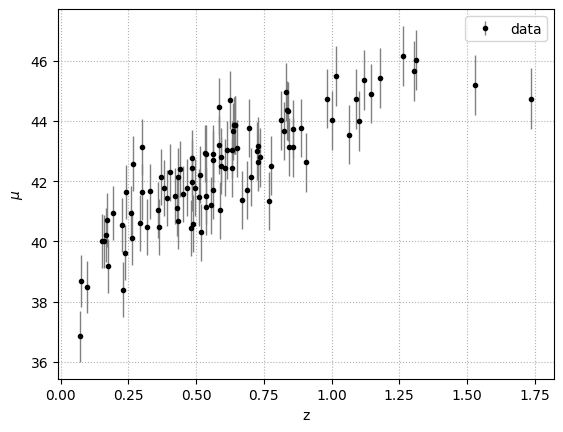

In [98]:
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234) # YOU CANNOT CHANGE THIS

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.legend()
plt.grid(linestyle=':')
plt.show()

In [99]:
# Reshape the data array
z_sample = z_sample[:, np.newaxis]

[39.48384602  4.76438865]


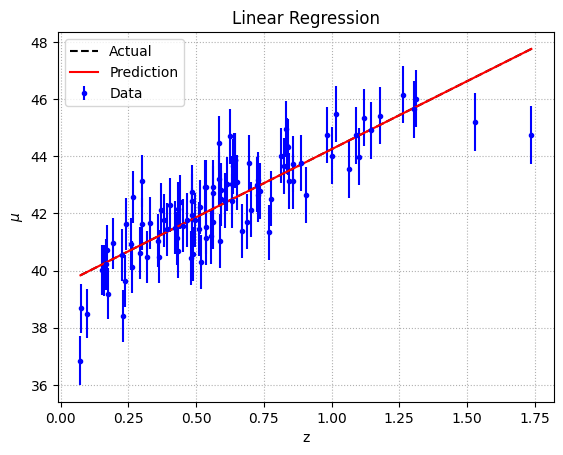

In [102]:
# Linear Regression 
lin_reg = LinearRegression()
lin_reg.fit(z_sample, mu_sample, dmu)

theta_lin = lin_reg.coef_

print(theta_lin)

X_grid = np.linspace(np.min(z_sample), np.max(z_sample), 100)
y_true = theta_lin[0] + theta_lin[1] * X_grid

y_pred = lin_reg.predict(X_grid[:, np.newaxis])

plt.errorbar(z_sample, mu_sample, dmu, fmt="b.", label='Data')
plt.plot(X_grid, y_true, "k--", label='Actual')
plt.plot(X_grid, y_pred, "r-", label='Prediction')
plt.title("Linear Regression")
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend()
plt.grid(linestyle=':')
plt.show()

[38.36452837  8.87820312 -3.06677777  0.17557977]


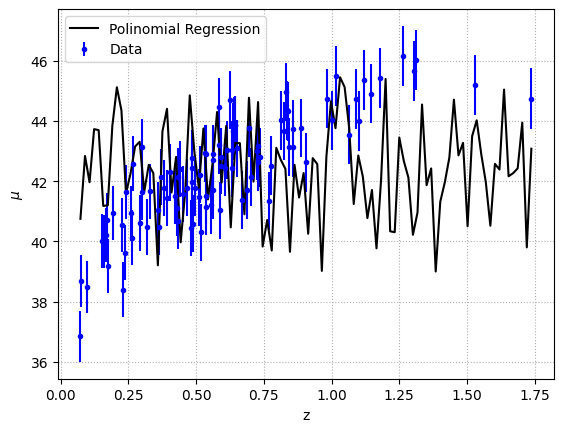

In [ ]:
# Polinomial Regression
degree = 3
pol_reg = PolynomialRegression(degree) # fit 3rd degree polynomial
pol_reg.fit(z_sample, mu_sample, dmu)

y_pred = pol_reg.predict(z_sample)
n_constraints = degree + 1

theta_pol = pol_reg.coef_
print(theta_pol)

x_fit = np.linspace(np.min(z_sample), np.max(z_sample), 100)

plt.errorbar(z_sample, mu_sample, dmu, fmt="b.", label='Data')
plt.plot(x_fit, y_pred, "k-", label='Polinomial Regression')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend()
plt.grid(linestyle=':')
plt.show()

## Part 2

## Part 3